<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Explore_Weather_Trends/Explore_Weather_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Weather Trends

## Purpose
An introductory project from Udacity's Data Analyst Nanodegree Program analyzes local and global temperature data and compares the temperature trends in selected cities with overall global temperature trends.

## Dataset
There are three tables in the database:
- `city_list` - This contains a list of cities and countries in the database. Look through them in order to find the city nearest to you.
- `city_data` - This contains the average temperatures for each city by year (ºC).
- `global_data` - This contains the average global temperatures by year (ºC).

Data for analysis is extracted using the following SQL query:

```
SELECT  city.year,
        city.city,
        city.avg_temp as city_avg_temp,
        global.avg_temp as glob_avg_temp
FROM city_data city, global_data global
WHERE  city.year = global.year AND
       city in ('Prague', 'Johannesburg', 'New York', 
                'Shanghai', 'Sydney', 'Rio De Janeiro')
```

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/lustraka/Data_Analysis_Workouts/main/Explore_Weather_Trends/temp_data.csv'
data = pd.read_csv(data_url)
print(data.head())

   year      city  city_avg_temp  glob_avg_temp
0  1750    Prague           9.11           8.72
1  1750  New York          10.07           8.72
2  1751  New York          10.79           7.98
3  1751    Prague           9.13           7.98
4  1752  New York           2.81           5.78


In [3]:
series = {'globe' : data.groupby('year').glob_avg_temp.first()}
for city in data.city.unique():
  series[city] = data.loc[data.city == city, ['year', 'city_avg_temp']].set_index('year').squeeze()

In [4]:
stats = {}
for k,v in series.items():
  stats[k] = [v.index[0], len(v), v.mean(), series['globe'].corr(v)]
pd.set_option('max_columns', None) # To print all columns
print(pd.DataFrame(stats, index=['First observation', 'Number of observations', 'Average temperature', 'Correlation']))

                              globe       Prague     New York  Rio De Janeiro  \
First observation       1750.000000  1750.000000  1750.000000     1832.000000   
Number of observations   264.000000   264.000000   264.000000      182.000000   
Average temperature        8.359394     8.234924     9.486882       23.791486   
Correlation                1.000000     0.517957     0.563413        0.798931   

                           Shanghai       Sydney  Johannesburg  
First observation       1841.000000  1841.000000   1857.000000  
Number of observations   173.000000   173.000000    157.000000  
Average temperature       15.973237    17.004220     15.067006  
Correlation                0.784995     0.754343      0.729322  


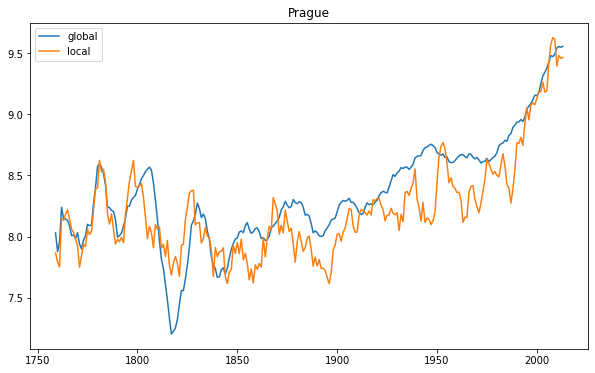

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ct = data.loc[data.city == 'Prague', ['year', 'city_avg_temp']].set_index('year').squeeze()
ax.plot(series['globe'].rolling(10).mean(), label='global')
ax.plot(series['Prague'].rolling(10).mean(), label='local')
ax.set_title('Prague')
ax.legend()
plt.show()

In [7]:
cities = data.city.unique()
cities.shape=(3,2)

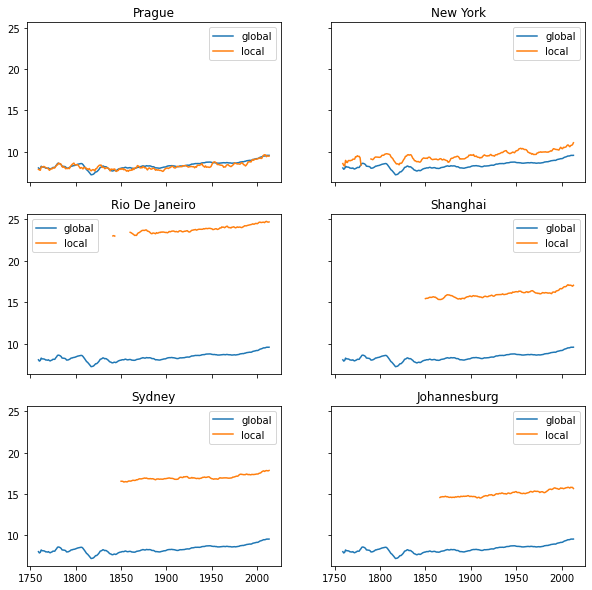

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(10,10), sharex='all', sharey='all')
glob_temp_moving = series['globe'].rolling(10).mean()
for c in [0,1]:
  for r in [0,1,2]:
    ax[r,c].plot(glob_temp_moving, label='global')
    ax[r,c].plot(series[cities[r,c]].rolling(10).mean(), label='local')
    ax[r,c].set_title(cities[r,c])
    ax[r,c].legend()
plt.show()